# <a name="top">WeRateDogs - Udacity Data Wrangling Project 03 </a>
---
## GATHER & ASSESS 3 datasets from 3 different sources:
1. [Gather/Assess Data #1](#gatherassess1) - Twitter archive, twitter-archive-enhanced.csv (local archive). format: CSV
2. [Gather/Assess Data #2](#gatherassess2) - Tweet image predictions - Download data from file_url utilizing requests library. format: TSV
3. [Gather/Assess Data #3](#gatherassess3) - Query Twitter API for additional data - image_preds (local archive created from image recognition system). format: TXT
 
## CLEAN (8) Quality Issues 
Also known as dirty data which includes mislabeled, corrupted, duplicated, inconsistent content issues, etc.

### twitter-archive-enhanced.csv quality issues:

1. [Quality #1](#q1) - columns 'timestamp' & 'retweeted_status_timestamp' are objects (strings) and not of 'timestamp' type. Change type to timestamp

2. [Quality #2](#q2) - twitterDF.name contains a lot of non-dog names, e.g. 'a', 'an', 'actually', etc; Replace with np.NaN
   
3. [Quality #3](#q3) - ratings with decimal values in the numerator not extracted from string properly

4. [Quality #4](#q4) - remove URL from 'source' & replace with 4 categories: iphone, vine, twitter, tweetdeck

5. [Quality #5](#q5) - `in_reply_to_status_id` and `in_reply_to_user_id` are type float; Convert to object(string)
 
6. [Quality #6](#q6) - find & update incorrect ratings, manually, e.g. 24/7 meaning 24 hours / 7 days, rating = 24 numerator, 7 denominator


### rt_tweets quality issues:

7. [Quality #7](#q7) - create new dataframe of columns needed (or remove columns not needed)

8. [Quality #8](#q8) - remove retweets


---
## CLEAN (2) Tidiness Issues
Messy data includes structural issues where variables don't form a column, observations form rows, & each observational unit forms a table.

1. [Tidy #1](#t1) - dog stages need to be combined into one column

2. [Tidy #2](#t2) - merge all three datasets to form one; three similar datasets should form one observation unit
---
## Insights from Data Analysis:

1. [BAR CHART 1](#vis1) - Horizontal Bar Chart (WeRateDogs Dog Breeds represented (top 10))
2. [BAR CHART 2](#vis2) - Horizontal Bar Chart (Top 15 Favorites (tweets), by probable name)
3. [Insight #3](#prog1) - Top 40 most predicted dog breeds
4. [Insight #4](#prog2) - Grouping of dataframe on the first predicted name for various mean data
---

## Saved new dataframe to file 
[Save to file, WeRateDogs_migration.csv](#save1) to file.

## Import Libraries

In [56]:
import pandas as pd
import numpy as np
import os
import requests

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
%matplotlib inline

pd.set_option('display.max_columns', None)

<a name="gatherassess1">.</a>
## Gather/Assess Data #1 - Twitter Archive Enhanced

In [57]:
# Read data into dataframe
twitterDF_orig = pd.read_csv("data/twitter-archive-enhanced.csv")

# Make copy of dataframe
twitterDF = twitterDF_orig.copy()

In [58]:
# Visually Assess Twitter Archive
twitterDF.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,None,None,pupper,None
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124...,13,10,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1403,699413908797464576,NaN,NaN,2016-02-16 02:04:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Miley. She's a Scandinavian Hollabackgirl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,None,None,None,None
995,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,None,None,None,None
554,803773340896923648,NaN,NaN,2016-11-30 01:31:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,None,None,None,puppo
1470,694001791655137281,NaN,NaN,2016-02-01 03:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's a Benefloof Cumberbark. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694001791...,11,10,Chester,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None
1558,688789766343622656,NaN,NaN,2016-01-17 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688789766...,8,10,Pubert,None,None,None,None


In [59]:
# Programmatically Assess
# review data columns in DF, are Dtypes appropriate, etc.
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [60]:
# Programmatically Assess
# find all tweets where the retweeted_status_id is notnull
twitterDF[twitterDF.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


[BACK TO TOP](#top)

In [61]:
# Programmitically Assess
# review names of pups
# twitterDF.name.value_counts(): using this was harder to see the invalid names
twitterDF[twitterDF.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
getting          2
mad              2
not              2
actually         2
by               1
space            1
light            1
such             1
infuriating      1
old              1
incredibly       1
unacceptable     1
officially       1
my               1
life             1
this             1
all              1
his              1
Name: name, dtype: int64

In [62]:
# Programmatically Assess
# review dogtionary names; interesting to see id# 200 has 2 values, doggo & floofer
twitterDF[twitterDF['floofer'] != 'None'].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None


In [63]:
# it appears the stages are pulled from the tweeted text, 'doggo' & 'floofer' in text below

twitterDF.loc[200,'text']

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [64]:
# illustrate multiple stages designated to some pups

twitterDF[(twitterDF[['doggo','floofer','pupper','puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [65]:
# what do ratings look like when the denominator != 0
# np.where
rating_errors = twitterDF[twitterDF['rating_denominator'] != 10]
rating_errors.loc[:,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [66]:
# take a closer look at the results from rating errors

rating_errors.iloc[3,5]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [67]:
# closer look at rating errors. I'm not sure about this rating, 80/80

rating_errors.iloc[10,5]

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

<a name="gatherassess2">.</a>
## Gather Data #2 - Tweet image predictions

In [68]:
# Download data from file_url utilizing requests library & save to line #5
file_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
req = requests.get(file_url)
fname = os.path.basename(file_url)
open("data/" + fname, 'wb').write(req.content)

335079

In [69]:
# Nows read file downloaded & view sample to ensure read_csv worked. Also works as a visual assessment.
image_preds_orig = pd.read_csv("data/image-predictions.tsv", sep="\t")
image_preds = image_preds_orig.copy()

# visual assessment
image_preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1678,813202720496779264,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,1,cocker_spaniel,0.701852,True,golden_retriever,0.120345,True,Labrador_retriever,0.036320,True
173,669006782128353280,https://pbs.twimg.com/media/CUjKHs0WIAECWP3.jpg,1,Chihuahua,0.127178,True,Italian_greyhound,0.054215,True,pillow,0.048592,False
789,690597161306841088,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
129,668286279830867968,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,1,golden_retriever,0.215944,True,basset,0.189214,True,Cardigan,0.113010,True
1765,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,French_bulldog,0.628119,True,Siamese_cat,0.117397,False,cougar,0.082765,False


In [70]:
# programmatic assessment
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


 <a name="gatherassess3">.</a>
## Gather/Assess Data #3 - Query Twitter API for additional data

Query Twitter's API for JSON data for each tweet ID in the Twitter archive

 * retweet count
 * favorite count
 * any additional data found that's interesting
 * only tweets on Aug 1st, 2017 (image predictions present)

In [71]:
# define keys & API info 
# authenticate API using regenerated keys/tokens

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [72]:
tweet_ids = twitterDF.tweet_id.values
len(tweet_ids)

2356

In [73]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
'''
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

### Start from here if data already obtained from Twitter                                                   

[BACK TO TOP](#top)

In [74]:
# Read tweet JSON into dataframe using pandas
# recived ValueError: Trailing data without 'lines=True'

rt_tweets_orig = pd.read_json("tweet.json", lines=True)
rt_tweets = rt_tweets_orig.copy()

# visual assessment as well as confirmation that read_json successful
rt_tweets.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7477,35388,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5549,30638,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3671,23034,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7649,38689,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8249,36965,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [75]:
# programmatic assessment
rt_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [76]:
# programmatic assessment
# View retweeted tweets, first 5 of 163, these will be deleted

rt_tweets[rt_tweets.retweeted_status.notnull()].head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,True,96,0,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,16399,0,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6049,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1131,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN,NaN
73,2017-06-23 18:17:33+00:00,878316110768087041,878316110768087040,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5898,0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN,NaN


In [77]:
# visual assessment
rt_tweets.user

0       {'id': 4196983835, 'id_str': '4196983835', 'na...
1       {'id': 4196983835, 'id_str': '4196983835', 'na...
2       {'id': 4196983835, 'id_str': '4196983835', 'na...
3       {'id': 4196983835, 'id_str': '4196983835', 'na...
4       {'id': 4196983835, 'id_str': '4196983835', 'na...
                              ...                        
2325    {'id': 4196983835, 'id_str': '4196983835', 'na...
2326    {'id': 4196983835, 'id_str': '4196983835', 'na...
2327    {'id': 4196983835, 'id_str': '4196983835', 'na...
2328    {'id': 4196983835, 'id_str': '4196983835', 'na...
2329    {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, Length: 2330, dtype: object

In [78]:
# visual assessment
rt_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [79]:
# visual assessment
# inspect the extended entities data
rt_tweets.loc[0,'extended_entities']

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [80]:
# visual assessment
# inspect the entities data
rt_tweets.loc[115,'entities']

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 869702951354474496,
   'id_str': '869702951354474496',
   'indices': [140, 163],
   'media_url': 'http://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg',
   'url': 'https://t.co/vmCu3PFCQq',
   'display_url': 'pic.twitter.com/vmCu3PFCQq',
   'expanded_url': 'https://twitter.com/dog_rates/status/869702957897576449/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 901, 'h': 1600, 'resize': 'fit'},
    'small': {'w': 383, 'h': 680, 'resize': 'fit'},
    'medium': {'w': 676, 'h': 1200, 'resize': 'fit'}}}]}

In [81]:
# visual assessment
rt_tweets.loc[130,'user']

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': 'merch ➜',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/N7sNNHSfPq',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8894598,
 'friends_count': 18,
 'listed_count': 6035,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145946,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 13082,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/them

In [82]:
# visual assessment
rt_tweets.iloc[1:8,11:]

,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
1,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,5549,30638,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3671,23034,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,7649,38689,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8249,36965,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,2759,18630,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1791,10828,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,16725,59634,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


---
<a name="q1">-</a>
### Define

### Q1 - Convert dtype of timestamp columns

### Code

In [83]:
# Fixed 2 columns with incorrect datatypes, changed to datetime64
twitterDF.timestamp = pd.to_datetime(twitterDF.timestamp)
twitterDF.retweeted_status_timestamp = pd.to_datetime(twitterDF.retweeted_status_timestamp)

### Test

In [84]:
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

---
<a name="q2">-</a>
### Define

### Q2 - twitterDF.name contains a lot of non-dog names, e.g. 'a', 'an', 'actually', etc; Replace with np.NaN

### Code

In [85]:
# apparantely all of the invalid dog names are lowercase. See here.
# It's interesting to see the difference between this filter & the one below it
# Either way 'None' must be added manually

twitterDF[twitterDF.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
getting          2
mad              2
not              2
actually         2
by               1
space            1
light            1
such             1
infuriating      1
old              1
incredibly       1
unacceptable     1
officially       1
my               1
life             1
this             1
all              1
his              1
Name: name, dtype: int64

In [86]:
# Alternate way to obtain all lowercase names using regex
# Had this been a thorough cleaning, further investigation would be required to understand
# the difference between these 2 filters
# Either way 'None' must be added manually

mask = twitterDF.name.str.contains('^[a-z]', regex = True)
twitterDF[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [87]:
# Create name list from regex mask
# Manually add 'None' to list

name_mask = list(set(twitterDF[mask].name.values))
name_mask.append('None')
name_mask

['by',
 'officially',
 'this',
 'my',
 'quite',
 'such',
 'old',
 'light',
 'very',
 'life',
 'a',
 'infuriating',
 'getting',
 'unacceptable',
 'the',
 'incredibly',
 'space',
 'an',
 'his',
 'actually',
 'mad',
 'just',
 'one',
 'all',
 'not',
 'None']

In [88]:
df = twitterDF.copy()

In [89]:
# I'm certain there's a more pythonic way to process a column according to a condition
# This little function checks if the pup's name falls within the name_mask list (all lowercase 'names', e.g. a, an, etc.)
# & returns NaN if TRUE & returns name back if FALSE

def pup_name(name):
    if name in name_mask:
        #print(f"name in mask: {name}")
        return np.NaN
    else:
        #print(f"name NOT in mask: {name}")
        return name        

In [90]:
# apply pup_name() func to every row of dataframe

twitterDF['name'] = twitterDF.apply(lambda row: pup_name(row['name']), axis=1)

### Test

In [91]:
# check to ensure all 'a' names are removed. Arbitrarily select a couple others to test
twitterDF[twitterDF.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [92]:
twitterDF[twitterDF.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


---
<a name="q3">-</a>
### Define 
### Q3 - Ratings with decimal values in the numerator not extracted from string properly

### Code

In [93]:
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [94]:
# update Dtype of ratings to float to accept the updated values

twitterDF.rating_numerator = twitterDF.rating_numerator.astype(float)
twitterDF.rating_denominator = twitterDF.rating_denominator.astype(float)
twitterDF.info()
twitterDF.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1823,676533798876651520,NaN,NaN,2015-12-14 22:46:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",ITSOFLUFFAYYYYY 12/10 https://t.co/bfw13CnuuZ,NaN,NaN,NaT,https://twitter.com/dog_rates/status/676533798...,12.0,10.0,NaN,None,None,None,None
1352,703774238772166656,NaN,NaN,2016-02-28 02:50:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https:...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/703774238...,10.0,10.0,NaN,None,None,None,None
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/742150209...,8.0,10.0,Edmund,None,None,pupper,None


In [95]:
# extract ratings from text to include decimal values for the NUMERATOR only & SEE result

ratings = twitterDF.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings.sample(5)

,0,1
762,12,10
108,12,10
1757,10,10
2034,11,10
625,12,10


In [96]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2356 non-null   object
 1   1       2356 non-null   object
dtypes: object(2)
memory usage: 36.9+ KB


In [97]:
# rename column names
# change num & denom to type float (to accomodate the decimal values)

ratings = ratings.rename(columns={0:'numerator',1:'denominator'})
ratings.numerator = ratings.numerator.astype(float)
ratings.denominator = ratings.denominator.astype(float)

ratings.info

<bound method DataFrame.info of       numerator  denominator
0          13.0         10.0
1          13.0         10.0
2          12.0         10.0
3          13.0         10.0
4          12.0         10.0
...         ...          ...
2351        5.0         10.0
2352        6.0         10.0
2353        9.0         10.0
2354        7.0         10.0
2355        8.0         10.0

[2356 rows x 2 columns]>

In [98]:
# replace dataframe numerator & denominator with updated regex version

twitterDF.rating_numerator = ratings.numerator
twitterDF.rating_denominator = ratings.denominator
twitterDF.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1271,709409458133323776,NaN,NaN,2016-03-14 16:02:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/709409458...,8.0,10.0,Billy,None,None,None,None
2059,671186162933985280,NaN,NaN,2015-11-30 04:37:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sparky. That's his pancake now. He wil...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671186162...,10.0,10.0,Sparky,None,None,None,None


### Test

In [99]:
twitterDF.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/837110210...,13.0,10.0,Clark,None,None,pupper,None
2077,670833812859932673,NaN,NaN,2015-11-29 05:16:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jett. He is unimpressed by flower. 7/1...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670833812...,7.0,10.0,Jett,None,None,None,None
749,779124354206535695,NaN,NaN,2016-09-23 01:04:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hurley. He's the curly one...,6.794628e+17,4.196984e+09,2015-12-23 00:45:35+00:00,https://twitter.com/dog_rates/status/679462823...,11.0,10.0,Hurley,None,None,None,None
1928,674045139690631169,NaN,NaN,2015-12-08 01:57:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674045139...,3.0,10.0,NaN,None,None,None,None
1225,714141408463036416,NaN,NaN,2016-03-27 17:25:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/714141408...,10.0,10.0,NaN,None,None,None,None
961,751132876104687617,NaN,NaN,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/751132876...,10.0,10.0,Cooper,None,None,None,puppo
294,837482249356513284,NaN,NaN,2017-03-03 01:58:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. He's a ship captain in real l...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/837482249...,13.0,10.0,Waffles,None,None,None,None
1810,676821958043033607,NaN,NaN,2015-12-15 17:51:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Finally some constructive political change in ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/676821958...,11.0,10.0,NaN,None,None,None,None
381,827324948884643840,NaN,NaN,2017-02-03 01:16:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphie. He's being treated for an ove...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/827324948...,12.0,10.0,Ralphie,None,None,None,None
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,7.713808e+17,4.196984e+09,2016-09-01 16:14:48+00:00,https://twitter.com/dog_rates/status/771380798...,11.0,10.0,Fizz,None,None,None,None


---
<a name="q4">-</a>
### Define
### Q4 - remove URL from 'source' & replace with 4 categories: iphone, vine, twitter, tweetdeck

In [100]:
# review names of sources
twitterDF.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Code

In [101]:
twitterDF.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None


In [102]:
# function to categorize source column

def update_source(row):
    if 'iphone' in row:
        return 'iphone'
    elif 'vine' in row:
        return 'vine'
    elif 'Twitter' in row:
        return 'twitter web client'
    elif 'TweetDeck' in row:
        return 'TweetDeck'

In [103]:
# run update_source function on every row to replace source text with shorter description of source
twitterDF.source = twitterDF.apply(lambda row: update_source(row['source']),axis=1)

### Test

In [104]:
# check to ensure function replaced items as intended
twitterDF.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01+00:00,iphone,Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/701545186...,10.0,10.0,Millie,None,None,pupper,None
882,760290219849637889,NaN,NaN,2016-08-02 01:44:48+00:00,twitter web client,This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/760290219...,13.0,10.0,Rocco,None,None,None,None
1882,674999807681908736,6.747934e+17,4.196984e+09,2015-12-10 17:11:09+00:00,iphone,Ok last one of these. I may try to make some m...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674999807...,13.0,10.0,NaN,None,None,None,None
2300,667062181243039745,NaN,NaN,2015-11-18 19:29:52+00:00,iphone,This is Keet. He is a Floridian Amukamara. Abs...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667062181...,10.0,10.0,Keet,None,None,None,None
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47+00:00,iphone,This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/879008229...,13.0,10.0,Beau,None,None,None,None


---
<a name="q5">-</a>
### Define
### Q5 - retweeted_status_id is of type float; change to object(text). `in_reply_to_status_id` and `in_reply_to_user_id` are type float. Convert to string

### Code

In [105]:
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

In [106]:
twitterDF.retweeted_status_id = twitterDF.retweeted_status_id.astype(object)
twitterDF.retweeted_status_user_id = twitterDF.retweeted_status_user_id.astype(object)

### Test

In [107]:
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    object             
 7   retweeted_status_user_id    181 non-null    object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   float64         

---
<a name="q6">-</a>
### Define
### Q6 - find & update incorrect ratings, manually

In [108]:
# Get list of all indices who's denominator_rating is NOT 10
not10 = np.where(twitterDF['rating_denominator'] != 10)
not10_lst = not10a[0].tolist()
not10_lst

In [ ]:
twitterDFtest = twitterDF[]

---
<a name="q7">-</a>
### Define 
### Q7 - create new dataframe of columns needed

In [115]:
# add columns to this list for creating a new DF with only columns we want only
tweet_cols = ['created_at','id','full_text','display_text_range','retweet_count','favorite_count','user']

In [116]:
# create new DF with column defined above
rt_tweets_sub = rt_tweets.loc[:,tweet_cols]
rt_tweets_sub.head(10)

,created_at,id,full_text,display_text_range,retweet_count,favorite_count,user
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,2017-07-29 00:08:17+00:00,891087950875897856,Here we have a majestic great white breaching ...,"[0, 138]",2759,18630,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,2017-07-28 16:27:12+00:00,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,"[0, 140]",1791,10828,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,2017-07-28 00:22:40+00:00,890729181411237888,When you watch your owner call another dog a g...,"[0, 118]",16725,59634,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,2017-07-27 16:25:51+00:00,890609185150312448,This is Zoey. She doesn't want to be one of th...,"[0, 122]",3815,25645,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,2017-07-26 15:59:51+00:00,890240255349198849,This is Cassie. She is a college pup. Studying...,"[0, 133]",6490,29261,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [117]:
# dataframe has a different name for its shared column, id --> tweet_id
rt_tweets_sub = rt_tweets_sub.rename(columns={"id":"tweet_id"})
rt_tweets_sub.head(5)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [118]:
# MERGE 2 dataframes!
new_tweets_df = pd.merge(rt_tweets_sub, twitterDF, on='tweet_id')
new_tweets_df.head(3)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None


In [119]:
# data exploration
new_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2329
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   created_at                  2330 non-null   datetime64[ns, UTC]
 1   tweet_id                    2330 non-null   int64              
 2   full_text                   2330 non-null   object             
 3   display_text_range          2330 non-null   object             
 4   retweet_count               2330 non-null   int64              
 5   favorite_count              2330 non-null   int64              
 6   user                        2330 non-null   object             
 7   in_reply_to_status_id       78 non-null     float64            
 8   in_reply_to_user_id         78 non-null     float64            
 9   timestamp                   2330 non-null   datetime64[ns, UTC]
 10  source                      2330 non-null   object          

In [120]:
# MERGE newly merged dataframe and image_preds to get new_tweets_df2
new_tweets_df2 = pd.merge(new_tweets_df, image_preds, on='tweet_id')

---
<a name="q8">-</a>
### Define
### Q8 - remove retweets & delete columns

In [121]:
twitterDF.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47+00:00,iphone,This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667902449...,9.0,10.0,Cleopatricia,None,None,None,None
961,751132876104687617,NaN,NaN,2016-07-07 19:16:47+00:00,iphone,This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/751132876...,10.0,10.0,Cooper,None,None,None,puppo


### Code

In [122]:
# Get indices of rows to drop, in this case, any row with a value in retweeted_status_id different that NaN.  
drop_these = twitterDF[twitterDF['retweeted_status_id'].notnull()].index
twitterDF.drop(drop_these,inplace=True)
twitterDF.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25+00:00,iphone,This is officially the greatest yawn of all ti...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/679111216...,12.0,10.0,NaN,None,None,None,None
239,846874817362120707,NaN,NaN,2017-03-29 00:01:05+00:00,iphone,"This is Tuck. As you can see, he's rather h*ck...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/846874817...,13.0,10.0,Tuck,None,None,None,None
1831,676215927814406144,NaN,NaN,2015-12-14 01:43:35+00:00,iphone,This is Herm. He just wants to be like the oth...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/676215927...,9.0,10.0,Herm,None,None,None,None


In [123]:
# check if any 'notnull' entries exist in retweeted_status_id
twitterDF[twitterDF['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [124]:
# get rid of 3 empty columns representing the retweeted tweets
drop_cols = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitterDF.drop(drop_cols,axis=1,inplace=True)
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   1391 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### Test

In [125]:
# check to ensure cols dropped
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   1391 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

[BACK TO TOP](#top)

<a name="t1">-</a>
## Tidy #1 - Dog stages need to be combined into one column

### Code

<a name="t2">-</a>
## Tidy #2 - Merge all three datasets to form one. Three similar datasets should form one observation unit.
1. twitterDF
2. rt_tweets_sub
3. image_preds


In [126]:
# data exploration
twitterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   float64            
 8   rating_denominator     2175 non-null   float64            
 9   name                   1391 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

In [127]:
# data exploration
rt_tweets_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2330 non-null   datetime64[ns, UTC]
 1   tweet_id            2330 non-null   int64              
 2   full_text           2330 non-null   object             
 3   display_text_range  2330 non-null   object             
 4   retweet_count       2330 non-null   int64              
 5   favorite_count      2330 non-null   int64              
 6   user                2330 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 127.5+ KB


In [128]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## <a name="save1">New Dataframe saved to file</a>

In [129]:
# write new dataframe to file
new_tweets_df2.to_csv("twitter_archive_master.csv")

[BACK TO TOP](#top)

## DATA ANALYSIS

In [130]:
# data exploration
new_tweets_df2.head(5)

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]",7477,35388,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 16:23:56+00:00,iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",5549,30638,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-08-01 00:17:27+00:00,iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",3671,23034,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-31 00:18:03+00:00,iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"[0, 79]",7649,38689,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-30 15:58:51+00:00,iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",8249,36965,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-07-29 16:00:24+00:00,iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [131]:
# data exploration
# how many names are blank(null)
new_tweets_df2.name.isnull().count()

2058

In [132]:
# data exploration
new_tweets_df2.loc[576,'expanded_urls']

'https://twitter.com/dog_rates/status/781955203444699136/photo/1'

In [133]:
# data exploration
new_tweets_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   created_at                  2058 non-null   datetime64[ns, UTC]
 1   tweet_id                    2058 non-null   int64              
 2   full_text                   2058 non-null   object             
 3   display_text_range          2058 non-null   object             
 4   retweet_count               2058 non-null   int64              
 5   favorite_count              2058 non-null   int64              
 6   user                        2058 non-null   object             
 7   in_reply_to_status_id       23 non-null     float64            
 8   in_reply_to_user_id         23 non-null     float64            
 9   timestamp                   2058 non-null   datetime64[ns, UTC]
 10  source                      2058 non-null   object          

In [134]:
# count the number of times a name was used for pup. New series, count_by_breed, is sorted by the index which is alphabetically 
# sorted by default 

count_by_breed = new_tweets_df2.groupby('p1').size()
count_by_breed

p1
Afghan_hound            4
African_crocodile       1
African_grey            1
African_hunting_dog     1
Airedale               12
                       ..
wombat                  4
wood_rabbit             3
wooden_spoon            1
wool                    2
zebra                   1
Length: 378, dtype: int64

<a name="prog1">.</a>
## Top 40 most predicted names

In [135]:
# see top 40 most predicted names 
count_by_breed.sort_values(ascending=False)[0:40]

p1
golden_retriever                  150
Labrador_retriever                 97
Pembroke                           87
Chihuahua                          81
pug                                57
chow                               44
Samoyed                            42
toy_poodle                         38
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     25
Chesapeake_Bay_retriever           23
miniature_pinscher                 23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Cardigan                           19
web_site                           19
Shetland_sheepdog                  18
Eskimo_dog                         18
beagle                             18
Maltese_dog                        18
Staffordshire_bullterrier          18
teddy                              18
Lakeland_terrier                   17
Rottweile

In [136]:
# Investigate why 'seat_belt' is the 15th most predicted name for a dog picture. These are all tweets who's value equals
# 'seat_belt' and groupby the 2nd predicted value

new_tweets_df2.query("p1 == 'seat_belt'").groupby('p2').size()

p2
Boston_bull                 1
Chesapeake_Bay_retriever    1
Eskimo_dog                  1
Great_Dane                  1
Labrador_retriever          2
Lakeland_terrier            1
Shih-Tzu                    1
chow                        1
golden_retriever            5
ice_bear                    1
miniature_pinscher          3
sunglasses                  2
toy_poodle                  1
toy_terrier                 1
dtype: int64

In [138]:
# create new series of the top 10 names used for pups

top10_names = count_by_breed.sort_values(ascending=False).head(10)
top10_names

p1
golden_retriever      150
Labrador_retriever     97
Pembroke               87
Chihuahua              81
pug                    57
chow                   44
Samoyed                42
toy_poodle             38
Pomeranian             38
cocker_spaniel         30
dtype: int64

In [139]:
top10_names.index.values

array(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Samoyed', 'toy_poodle', 'Pomeranian',
       'cocker_spaniel'], dtype=object)

In [140]:
top10_val_array = top10_names.values
top10_val_array

array([150,  97,  87,  81,  57,  44,  42,  38,  38,  30], dtype=int64)

## <a name="vis1"> Horizontal Bar Chart to visualize the top 10 breeds represented during the timeframe </a>

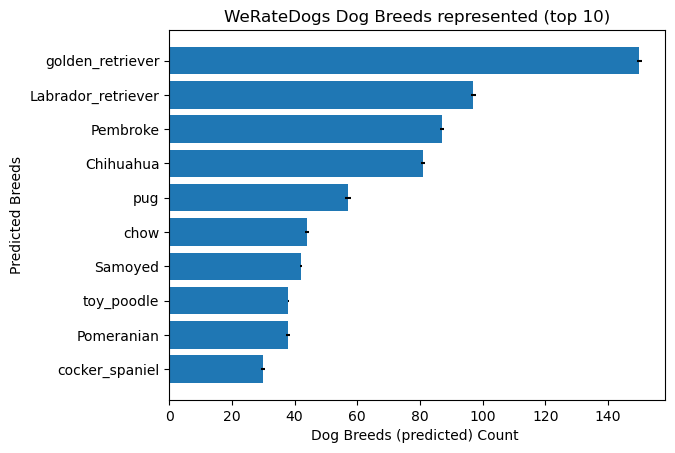

In [141]:
# Horizontal Bar Chart to visualize the top 10 breeds represented during the timeframe
# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

names = top10_names.index.values 

y_pos = np.arange(len(names))

performance = top10_names.values
error = np.random.rand(len(names))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Dog Breeds (predicted) Count ')
ax.set_ylabel('Predicted Breeds')
ax.set_title('WeRateDogs Dog Breeds represented (top 10)')

plt.show()

[BACK TO TOP](#top)

In [142]:
# Data Exploration
new_tweets_df2.iloc[300:305,0:10]

,created_at,tweet_id,full_text,display_text_range,retweet_count,favorite_count,user,in_reply_to_status_id,in_reply_to_user_id,timestamp
300,2017-01-31 17:06:32+00:00,826476773533745153,This is Pilot. He has mastered the synchronize...,"[0, 132]",4111,18170,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-31 17:06:32+00:00
301,2017-01-31 01:27:39+00:00,826240494070030336,We only rate dogs. Please don't send in any mo...,"[0, 114]",2564,13124,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-31 01:27:39+00:00
302,2017-01-30 23:05:46+00:00,826204788643753985,"Here's a little more info on Dew, your favorit...","[0, 116]",908,4820,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-30 23:05:46+00:00
303,2017-01-30 17:10:04+00:00,826115272272650244,This is Ike. He's demonstrating the pupmost re...,"[0, 75]",3047,15452,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-30 17:10:04+00:00
304,2017-01-30 01:21:19+00:00,825876512159186944,This is Mo. No one will push him around in the...,"[0, 106]",1834,10363,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,2017-01-30 01:21:19+00:00


In [143]:
# Data Exploration
new_tweets_df2.iloc[300:305,11:20]

,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo
300,This is Pilot. He has mastered the synchronize...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/826476773...,12.0,10.0,Pilot,doggo
301,We only rate dogs. Please don't send in any mo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/826240494...,11.0,10.0,NaN,None
302,"Here's a little more info on Dew, your favorit...",NaN,NaN,NaT,http://us.blastingnews.com/news/2017/01/kentuc...,13.0,10.0,NaN,doggo
303,This is Ike. He's demonstrating the pupmost re...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/826115272...,13.0,10.0,Ike,None
304,This is Mo. No one will push him around in the...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/825876512...,11.0,10.0,Mo,None


In [144]:
## Data Insight/Analysis
## Owner named their pup this number of times. 

new_tweets_df2.name.value_counts()

Penny      10
Charlie    10
Cooper     10
Tucker     10
Oliver     10
           ..
Ronnie      1
Tebow       1
Roscoe      1
Patch       1
Jaspers     1
Name: name, Length: 911, dtype: int64

[BACK TO TOP](#top)

In [145]:
top10_names_used = list(top10_names.index)

In [146]:
top10_names_used

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'toy_poodle',
 'Pomeranian',
 'cocker_spaniel']

[BACK TO TOP](#top)

<a name="prog2">.</a>

### More DATA ANALYSIS

In [147]:
## Create grouping of dataframe on the first predicted name, p1, & obtain the mean of specific data points

# This one provides appropriate columns but it correctly displayed the resulting dataframe in p1 alphabetic order
# which is not statistically significant

name_by_avgs = new_tweets_df2.groupby("p1")[['p1_conf','rating_numerator','rating_denominator','favorite_count',
                                             'retweet_count']].mean()
#Actually, you just need to pull out the rows you want, top10names, from the name_by_avgs. It's just sorted alphabetically
#name_by_avgs = new_tweets_df2.groupby(new_tweets_df2[newtop10])[['p1_conf','rating_numerator','rating_denominator','doggo','floofer',
#                                                 'pupper','puppo','favorite_count','retweet_count']].mean()


name_by_avgs.head(10)

,p1_conf,rating_numerator,rating_denominator,favorite_count,retweet_count
p1,,,,,
Afghan_hound,0.394129,10.500000,10.0,11574.00,6084.250000
African_crocodile,0.330625,10.000000,10.0,864.00,230.000000
African_grey,0.270468,11.000000,10.0,4729.00,1094.000000
African_hunting_dog,0.733025,8.000000,10.0,1542.00,1021.000000
Airedale,0.583771,9.833333,10.0,4716.75,1190.666667
American_Staffordshire_terrier,0.636330,10.833333,10.0,5562.50,1606.500000
American_black_bear,0.219166,8.000000,10.0,4362.00,1120.000000
Angora,0.571526,7.000000,10.0,42585.50,14058.000000
Appenzeller,0.503665,11.000000,10.0,6553.00,1227.500000


In [148]:
# Get the highest average of retweets by predicted names.
p1_retweets = name_by_avgs.retweet_count.sort_values(ascending=False)
p1_retweets.head(10)

# The results indicate that tweets with pictures that are predicted as an "Arabian_camel" had an average retweet count of 17,424
# retweets. This insight says more about the neural network results and it's accuracy than the retweet specifics

p1
Arabian_camel    17424.000000
conch            17304.000000
upright          15837.000000
bubble           14887.500000
prison           14693.666667
gondola          14345.500000
Angora           14058.000000
beaver           13907.000000
laptop           13038.000000
revolver         12633.000000
Name: retweet_count, dtype: float64

## <a name="vis2">Notable analysis with visual bar chart </a>

### None of the top 15 favorited 'dog's' images were acturately identified as dogs

In [149]:
# create sub
favorites_by_name = name_by_avgs.loc[:,['favorite_count']]
favorites_by_name.sort_values(by=['favorite_count'], ascending=False, inplace=True)
# get top 15 of new subset to create visual from
top15_favorites = favorites_by_name.iloc[0:15,:]
group_names = top15_favorites.index
group_data = top15_favorites.favorite_count

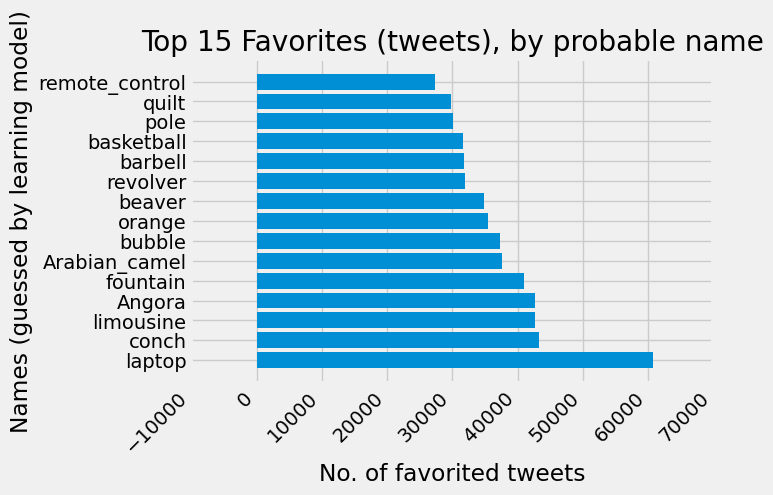

In [150]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 70000], xlabel='No. of favorited tweets', ylabel='Names (guessed by learning model)',
       title='Top 15 Favorites (tweets), by probable name')

plt.show;

[BACK TO TOP](#top)

In [151]:
name_by_avgs.query("rating_numerator >= 10").rating_numerator.sort_values(ascending=False)

p1
bow_tie                        451.500000
microphone                     420.000000
lakeside                       108.000000
soft-coated_wheaten_terrier     25.454545
teddy                           18.111111
                                  ...    
acorn_squash                    10.000000
pencil_box                      10.000000
cougar                          10.000000
skunk                           10.000000
ping-pong_ball                  10.000000
Name: rating_numerator, Length: 244, dtype: float64

In [152]:
name_by_avgs.rating_numerator.sort_values(ascending=True)

p1
traffic_light                    0.000000
lacewing                         1.000000
electric_fan                     1.000000
slug                             2.000000
scorpion                         2.000000
                                  ...    
teddy                           18.111111
soft-coated_wheaten_terrier     25.454545
lakeside                       108.000000
microphone                     420.000000
bow_tie                        451.500000
Name: rating_numerator, Length: 378, dtype: float64